In [2]:
url1 = 'https://raw.githubusercontent.com/alura-cursos/combina-classificadores/main/dados/train.csv'
url2 = 'https://raw.githubusercontent.com/alura-cursos/combina-classificadores/main/dados/test.csv'

In [3]:
import pandas as pd

In [4]:
treino = pd.read_csv(url1)

In [5]:
teste = pd.read_csv(url2)

In [6]:
treino.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
treino.isna().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [9]:
def prepara(df):
  df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
  df.dropna(inplace=True)
  colunas_categoricas = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
  df = pd.get_dummies(df, columns=colunas_categoricas)
  X = df.drop('satisfaction', axis=1)
  y = df['satisfaction']
  return X, y

In [10]:
X_treino, y_treino = prepara(treino)

In [11]:
X_teste, y_teste = prepara(teste)

#### Testando árvores de decisão

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

In [13]:
modelo1 = DecisionTreeClassifier(random_state=42)

In [14]:
validacao = cross_validate(modelo1, X_treino, y_treino, cv=5)

In [15]:
validacao['test_score']

array([0.94164776, 0.94603987, 0.9450263 , 0.94381968, 0.94521672])

In [16]:
validacao['test_score'].mean()

0.9443500672495754

In [17]:
modelo1.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=42)

In [18]:
y_pred = modelo1.predict(X_teste)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_teste, y_pred)

0.94612443517553

#### Pipeline

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
modelo2 = LogisticRegression(random_state=42)

In [23]:
validacao = cross_validate(modelo2, X_treino, y_treino)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [24]:
validacao['test_score'].mean()

0.8186670972160262

Problema com escala. Deixando na mesma escala ajuda o algoritmo.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [26]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', modelo2)])

In [27]:
validacao = cross_validate(pipeline, X_treino, y_treino)

In [28]:
validacao['test_score'].mean()

0.8749541859894492

#### Votando no melhor resultado

In [29]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

In [30]:
modelo3 = GaussianNB()

In [31]:
nome_modelos = ['arvores', 'logistica', 'naive bayes']

In [32]:
pipelines = []

for modelo, nome in zip([modelo1, modelo2, modelo3], nome_modelos):
  pipeline = Pipeline([('scaler', StandardScaler()),
                       ('model', modelo)
                       ])
  pipelines.append(pipeline)
  validacao = cross_validate(pipeline, X_treino, y_treino, cv=5)
  print(validacao['test_score'].mean())

0.9443983339909126
0.8749541859894492
0.8483406855152964


##### combinando os modelos

In [33]:
votacao = VotingClassifier(estimators = [
    (nome_modelos[0], pipelines[0]),
    (nome_modelos[1], pipelines[1]),
    (nome_modelos[2], pipelines[2]),
], voting='hard')

In [34]:
votacao

VotingClassifier(estimators=[('arvores',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('model',
                                               DecisionTreeClassifier(random_state=42))])),
                             ('logistica',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('model',
                                               LogisticRegression(random_state=42))])),
                             ('naive bayes',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('model', GaussianNB())]))])

In [35]:
validacao = cross_validate(votacao, X_treino, y_treino, cv=5)

In [36]:
validacao['test_score'].mean()

0.8917601803912731

#### Votação SOFT

In [37]:
votacao = VotingClassifier(estimators = [
    (nome_modelos[0], pipelines[0]),
    (nome_modelos[1], pipelines[1]),
    (nome_modelos[2], pipelines[2]),
], voting='soft')

In [38]:
validacao = cross_validate(votacao, X_treino, y_treino, cv=5)

In [39]:
validacao['test_score'].mean()

0.9007375478071673

Cliente satisfeito ou insatisfeito (binária)

tree, lr, nb

[0, 1, 0] -> hard = 0 (maioria)

[0.8 * 0, 0.1 * 1, 0.1 * 0] -> soft = 0; peso é dado para cada algoritmo.

#### Tunando a votação

como escolher os melhores parametros para a votação?

In [40]:
# Busca pelos parâmetros
parametros = {
    'voting': ['hard', 'soft'],
    'weights': [(1,1,1), (2,1,1), (1,2,1), (1,1,2)]
}

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
gs = GridSearchCV(votacao, parametros, n_jobs=-1)

In [43]:
gs.fit(X_treino, y_treino)

GridSearchCV(estimator=VotingClassifier(estimators=[('arvores',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler()),
                                                                     ('model',
                                                                      DecisionTreeClassifier(random_state=42))])),
                                                    ('logistica',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler()),
                                                                     ('model',
                                                                      LogisticRegression(random_state=42))])),
                                                    ('naive bayes',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler()),
                                                                     ('model',
                                                                      GaussianNB())]))],
                                        voting='soft'),
             n_jobs=-1,
             param_grid={'voting': ['hard', 'soft'],
                         'weights': [(1, 1, 1), (2, 1, 1), (1, 2, 1),
                                     (1, 1, 2)]})

In [44]:
gs.best_params_

{'voting': 'soft', 'weights': (2, 1, 1)}

In [45]:
gs.best_score_

0.9443983339909126

In [46]:
y_pred = gs.predict(X_teste)

In [47]:
accuracy_score(y_teste, y_pred)

0.9462402966052601

#### BaggingClassifier

In [48]:
from sklearn.ensemble import BaggingClassifier

In [49]:
bc = BaggingClassifier(n_estimators=10, random_state=42)

In [50]:
bc.fit(X_treino, y_treino)

BaggingClassifier(random_state=42)

In [51]:
y_pred = bc.predict(X_teste)

In [52]:
accuracy_score(y_teste, y_pred)

0.9586760900629514

#### Validando o Bagging

In [53]:
modelo_base = pipelines[0]  # escolhemos o melhor modelo como base

In [54]:
parametros_grid = {
    'n_estimators': [10,20,30],
    'max_samples': [0.5,0.7,0.9],
    'max_features': [0.5,0.7,0.9]
}

In [55]:
bagging_grid = GridSearchCV(
    BaggingClassifier(),
    parametros_grid,
    cv=5,
    n_jobs=-1
)

In [56]:
bagging_grid.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [0.5, 0.7, 0.9],
                         'max_samples': [0.5, 0.7, 0.9],
                         'n_estimators': [10, 20, 30]})

In [57]:
bagging_grid.best_params_

{'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 30}

In [58]:
melhores_parametros = bagging_grid.best_params_

In [59]:
bagging_classifier = BaggingClassifier(estimator=modelo_base, **melhores_parametros)

In [60]:
bagging_classifier.fit(X_treino, y_treino)

BaggingClassifier(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                            ('model',
                                             DecisionTreeClassifier(random_state=42))]),
                  max_features=0.9, max_samples=0.9, n_estimators=30)

In [61]:
y_pred = bagging_classifier.predict(X_teste)

In [62]:
accuracy_score(y_teste, y_pred)

0.9621905534314293

#### ExtraTreesClassifier

não utiliza 'max_samples'

In [63]:
parametros_grid = {
    'n_estimators': [10,20,30],
    'max_features': [0.5,0.7,0.9]
}

In [64]:
from sklearn.ensemble import ExtraTreesClassifier

In [65]:
etc_grid = GridSearchCV(
    ExtraTreesClassifier(),
    parametros_grid,
    cv=5,
    n_jobs=-1
)

In [66]:
etc_grid.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_features': [0.5, 0.7, 0.9],
                         'n_estimators': [10, 20, 30]})

In [67]:
etc_grid.best_params_

{'max_features': 0.9, 'n_estimators': 30}

In [68]:
melhores_parametros = etc_grid.best_params_

In [69]:
etc = ExtraTreesClassifier(**melhores_parametros)

In [70]:
etc.fit(X_treino, y_treino)

ExtraTreesClassifier(max_features=0.9, n_estimators=30)

In [71]:
y_pred = etc.predict(X_teste)

In [72]:
accuracy_score(y_teste, y_pred)

0.9640829567836867

#### AdaBoost

In [73]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
modelo = AdaBoostClassifier(n_estimators=50, learning_rate=1)

In [75]:
modelo.fit(X_treino, y_treino)

AdaBoostClassifier(learning_rate=1)

In [76]:
y_pred = modelo.predict(X_teste)

In [77]:
accuracy_score(y_teste, y_pred)

0.9263121306916927

#### Parâmetros do AdaBoost

In [78]:
param_grid = {
    'n_estimators': [50,100,200],
    'learning_rate': [0.1,0.01,0.001]
}

In [79]:
ada = AdaBoostClassifier()

In [80]:
gs = GridSearchCV(ada, param_grid, cv=5,scoring='accuracy', n_jobs=-1)

In [81]:
gs.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [82]:
y_pred = gs.predict(X_teste)

In [83]:
accuracy_score(y_teste, y_pred)

0.9248445525817789

In [84]:
gs.best_score_

0.9258161725228913

#### CatBoost

In [85]:
!pip install catboost

In [86]:
from catboost import CatBoostClassifier # Category Boosting

In [87]:
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [88]:
grid_search = GridSearchCV(estimator=CatBoostClassifier(verbose=0),
                           param_grid=param_grid,
                            cv=5,
                            scoring='accuracy',
                            n_jobs=-1
                          )

In [89]:
grid_search.fit(X_treino, y_treino)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7836efc51010>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'learning_rate': [0.1, 0.01, 0.001]},
             scoring='accuracy')

In [90]:
y_pred_cat = grid_search.predict(X_teste)

In [91]:
accuracy_score(y_teste, y_pred_cat)

0.9641988182134168

#### StackingCLassifier

In [92]:
from sklearn.ensemble import StackingClassifier

In [93]:
modelos_base = [
    (nome_modelos[0], pipelines[0]),
    (nome_modelos[1], pipelines[1]),
    (nome_modelos[2], pipelines[2])
]

In [94]:
modelos_base

[('arvores',
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('model', DecisionTreeClassifier(random_state=42))])),
 ('logistica',
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('model', LogisticRegression(random_state=42))])),
 ('naive bayes',
  Pipeline(steps=[('scaler', StandardScaler()), ('model', GaussianNB())]))]

In [95]:
modelo_meta = LogisticRegression(random_state=42)

In [96]:
stack_cl = StackingClassifier(estimators=modelos_base, final_estimator=modelo_meta)

In [97]:
stack_cl.fit(X_treino, y_treino)

StackingClassifier(estimators=[('arvores',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('model',
                                                 DecisionTreeClassifier(random_state=42))])),
                               ('logistica',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('model',
                                                 LogisticRegression(random_state=42))])),
                               ('naive bayes',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('model', GaussianNB())]))],
                   final_estimator=LogisticRegression(random_state=42))

In [98]:
y_pred = stack_cl.predict(X_teste)

In [99]:
accuracy_score(y_teste, y_pred)

0.9462402966052601

#### Validando o Stacking

In [100]:
!pip install mlxtend

In [101]:
from mlxtend.classifier import StackingCVClassifier

In [102]:
params_cat = grid_search.best_params_

In [103]:
param_trees = etc_grid.best_params_

In [104]:
base_models = [
    CatBoostClassifier(**params_cat),
    ExtraTreesClassifier(**param_trees),
    pipelines[2]
]

In [105]:
stack_cv_cl = StackingCVClassifier(classifiers=base_models, meta_classifier=modelo_meta)

In [106]:
mapeamento = {'neutral or dissatisfied': 0, 'satisfied':1}

In [107]:
y_treino = y_treino.replace(mapeamento)

/tmp/ipython-input-107-1797420716.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_treino = y_treino.replace(mapeamento)


In [108]:
y_treino

,satisfaction
0,0
1,0
2,1
3,0
4,1
...,...
103899,0
103900,1
103901,0
103902,0


In [109]:
y_teste = y_teste.replace(mapeamento)

/tmp/ipython-input-109-1345879902.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_teste = y_teste.replace(mapeamento)


In [110]:
#!pip install scikit-learn==1.3.2

In [111]:
stack_cv_cl.fit(X_treino, y_treino)

0:	learn: 0.5420653	total: 30ms	remaining: 8.97s
1:	learn: 0.4493981	total: 58.1ms	remaining: 8.65s
2:	learn: 0.3495367	total: 110ms	remaining: 10.9s
3:	learn: 0.2971945	total: 141ms	remaining: 10.4s
4:	learn: 0.2497124	total: 188ms	remaining: 11.1s
5:	learn: 0.2263031	total: 265ms	remaining: 13s
6:	learn: 0.2058353	total: 329ms	remaining: 13.8s
7:	learn: 0.1901546	total: 391ms	remaining: 14.3s
8:	learn: 0.1736569	total: 448ms	remaining: 14.5s
9:	learn: 0.1641688	total: 500ms	remaining: 14.5s
10:	learn: 0.1581200	total: 522ms	remaining: 13.7s
11:	learn: 0.1523406	total: 545ms	remaining: 13.1s
12:	learn: 0.1448231	total: 567ms	remaining: 12.5s
13:	learn: 0.1415017	total: 591ms	remaining: 12.1s
14:	learn: 0.1377367	total: 614ms	remaining: 11.7s
15:	learn: 0.1353960	total: 643ms	remaining: 11.4s
16:	learn: 0.1323455	total: 712ms	remaining: 11.8s
17:	learn: 0.1300342	total: 775ms	remaining: 12.1s
18:	learn: 0.1272756	total: 846ms	remaining: 12.5s
19:	learn: 0.1250602	total: 915ms	remaining

StackingCVClassifier(classifiers=[<catboost.core.CatBoostClassifier object at 0x7836efc5c790>,
                                  ExtraTreesClassifier(max_features=0.9,
                                                       n_estimators=30),
                                  Pipeline(steps=[('scaler', StandardScaler()),
                                                  ('model', GaussianNB())])],
                     meta_classifier=LogisticRegression(random_state=42))

In [132]:
y_pred = stack_cv_cl.predict(X_teste)

In [112]:
stack_cv_cl.score(X_teste, y_teste)

0.9639670953539566

#### Analisando os resultados

In [114]:
validacao = cross_validate(stack_cv_cl,
                           X_treino, y_treino,
                           cv=5, n_jobs=-1)

In [116]:
validacao['test_score']

array([0.96278778, 0.96471837, 0.96264298, 0.96568367, 0.96529588])

In [117]:
from mlxtend.evaluate import scoring

In [118]:
scoring(y_target=y_teste, y_predicted=y_pred, metric='error')

1.0

In [119]:
scoring(y_target=y_teste, y_predicted=y_pred, metric='precision')

/usr/local/lib/python3.11/dist-packages/mlxtend/evaluate/scoring.py:153: RuntimeWarning: invalid value encountered in divide
  res = float(tp) / (tp + fp)


nan

In [120]:
scoring(y_target=y_teste, y_predicted=y_pred, metric='recall')

0.0

In [121]:
scoring(y_target=y_teste, y_predicted=y_pred, metric='f1')


/usr/local/lib/python3.11/dist-packages/mlxtend/evaluate/scoring.py:155: RuntimeWarning: invalid value encountered in divide
  pre = float(tp) / (tp + fp)


nan

In [122]:
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

In [130]:
y_pred

array(['satisfied', 'satisfied', 'neutral or dissatisfied', ...,
       'neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied'],
      dtype=object)

In [133]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

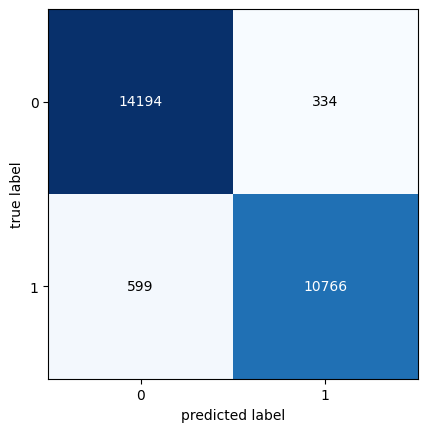

In [134]:
plot_confusion_matrix(conf_mat=matriz_confusao)

#### Salvando o modelo

In [135]:
import joblib

In [136]:
joblib.dump(stack_cv_cl, 'modelo_treinado.pkl')

['modelo_treinado.pkl']

In [137]:
modelo_carregado = joblib.load('modelo_treinado.pkl')

In [138]:
X_teste.iloc[2]

,2
Age,20
Flight Distance,192
Inflight wifi service,2
Departure/Arrival time convenient,0
Ease of Online booking,2
Gate location,4
Food and drink,2
Online boarding,2
Seat comfort,2
Inflight entertainment,2


In [139]:
previsao = modelo_carregado.predict([X_teste.iloc[2]])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [140]:
previsao

array([0])

Isso quer dizer que ele previu que um cliente de exemplo, com uma série de características sobre o voo daquele cliente, não ficará satisfeito com aquele voo.

O que isso quer dizer? No início do projeto, tínhamos nosso dataset com uma série de exemplos de clientes satisfeitos e insatisfeitos com os voos.

No decorrer do projeto, treinamos diferentes modelos de machine learning e chegamos à conclusão de que a combinação dos modelos mais elaborados, o ExtraTreesClassifier e o CatBoost, em conjunto com o StackingCVClassifier, retornava um melhor resultado, um modelo mais robusto.

Fomos capazes de salvar esse modelo, e com um modelo salvo desse tipo, conseguimos passá-lo para outras pessoas, uma pessoa que vai construir, por exemplo, uma aplicação de machine learning que vai nos permitir prever se um passageiro ficará satisfeito ou não com o voo, passadas determinadas informações.

Nesse caso, sabendo antecipadamente se o cliente vai ficar satisfeito ou não com o voo, conseguimos direcionar nossos clientes para outros voos e assim por diante. Temos um modelo perfeito para fazer essas previsões e está disponível para uso na empresa como um modelo em produção.